Correlation Matrix : 
            edu_index    gini
edu_index     1.0000 -0.3715
gini         -0.3715  1.0000
r2 score: 0.14


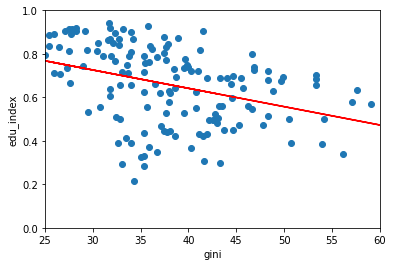

In [25]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: correlation analysis and linear regression (attempt)
# ASHISH ACHARYA
# LAST MODIFIED: 12:40 AM THURSDAY, OCT 7th, 2021

#from google.colab import drive
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import r2_score

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab_Datasets/country_indicators/'
DATASET_NAME = 'country_indicators.csv'

# Google drive mount
# drive.mount('/content/drive')

# TODO: create a pandas data frame from the CSV file
df = pd.read_csv(os.path.join(DATA_FOLDER, DATASET_NAME))

# (optional) TODO: define the country as the index for the data frame
# HAVE TO ASSIGN IT TO A DF BECASUE SET INDEX DOENST MODIFY THE ORIGINAL DF
df = df.set_index('country')
#display(df) #265 rows × 39 columns

# (optional) TODO: remove all columns except 'gini' and 'edu_index' from the data frame
df.drop(df.columns.difference(['gini','edu_index']), 1, inplace=True)
#display(df) #265 rows × 2 columns (as expected)

# TODO: remove any country (index) that does not have both 'gini' and 'edu_index' values
df = df[df['gini'].notna()] 
#display(df) #158 rows
df = df[df['edu_index'].notna()] 
#display(df) #148 rows

# TODO: compute and display the correlation matrix between 'gini' and 'edu_index'
corrMatrix = df.corr()
print ("Correlation Matrix : \n" , corrMatrix)

# TODO: attempt a linear regression model, displaying the obtained r2 score
X = df['gini'].values.reshape((-1, 1))
Y = df['edu_index'].values.reshape((-1, 1))
model = LinearRegression().fit(X, Y)
score = model.score(X, Y)
print('r2 score: {:.2f}'.format(score))


# TODO: produce a visualization of the data points and the fitted line
# plot 
Y_pred = model.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, '-r')
plt.xlabel('gini')
plt.ylabel('edu_index')
plt.xlim([25, 60])
plt.ylim([0, 1])
plt.show()
